In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import logging
logging.basicConfig(level=logging.INFO)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_hdf("../data/SPIEGEL_ONLINE_Zustand_der_Fernstraßenbrücken.h5")
df

,Bauwerksnr.,Name,Bundesland,Fläche (qm),Baujahr,Zustandsnote 09/2014,Zustandsnote 09/2015,Zustandsnote 03/2016,Zustandsnote 09/2016,Zustandsnote 03/2017,Zustandsnote 09/2017,Zustandsnote 03/2018,Geo UTM Ost,Geo UTM Nord,uuid
0,1019500-0,B 5 / Süderau,Schleswig-Holstein,63.0,1973.0,1.6,1.6,1.6,1.6,1.7,1.7,1.7,494241.4,6084088.0,646ac846dbaa5713a7591600589f8ee8
1,1119503-0,B 5 / Bosbüller Sielzug,Schleswig-Holstein,49.0,1961.0,2.3,2.3,2.3,2.3,2.2,2.2,2.2,492728.0,6074870.0,b71567c08e1f51639753a1b862a1f655
2,1119504-0,B 5 / Dreiharder Gotteskoog Strom,Schleswig-Holstein,62.0,1905.0,2.5,2.5,2.5,2.5,2.7,2.7,2.7,492821.2,6075575.0,cb79a5eacbef57f3ba0225d8c28ac7b7
3,1119505-0,B 5 / Kleiner Strom,Schleswig-Holstein,63.0,1962.0,2.8,2.8,2.8,2.8,2.8,2.8,2.2,494364.0,6083232.0,0f7cbd3a4e11559f96c62eb1a2486790
4,1119512-0,B 5 / Geh- und Radweg Klixbüll,Schleswig-Holstein,82.0,1981.0,1.8,1.8,1.8,1.8,2.0,2.0,2.0,492424.0,6073095.0,da9ab83ca7dc576ea7b4ea4e2b859bb7
5,1119514-0,Geh-/Radweg entl. B 5 / Dreiharder Gotteskoogs...,Schleswig-Holstein,34.0,1986.0,2.2,2.2,2.2,2.2,1.7,1.7,1.7,492821.3,6075576.0,13c6567366ef5c7cbfef367982631a41
6,1122500-1,B 200 / L 16 [AS Flensburg-Duburg]/Rifa DK - H...,Schleswig-Holstein,317.0,1967.0,2.4,2.4,2.5,2.4,2.5,2.5,2.5,526323.0,6072442.0,93280660320d579282518fc7c998c622
7,1122500-2,B 200 / L 16 [AS Flensburg-Duburg]/Rifa Husum ...,Schleswig-Holstein,320.0,1967.0,2.9,2.5,2.7,2.9,2.7,2.7,2.7,526323.0,6072442.0,0c57aff93529578582151e3192fcbd0a
8,1122501-0,"Gem.Str. ""Frösleeweg"" / B 200",Schleswig-Holstein,357.0,1967.0,2.5,2.4,2.4,2.5,2.4,2.4,2.4,526018.9,6073280.0,240fc17be6045e9f94f032217e586eae
9,1122502-1,"B 200 / Gem.Str. ""Bauer Landstraße""/Rifa DK - ...",Schleswig-Holstein,105.0,1966.0,2.5,2.7,2.7,2.5,2.7,2.7,2.7,526116.9,6073642.0,f63cae612c5f5ed39d276efb624088b4


In [3]:
len(df)

53526

In [4]:
df.columns

Index(['Bauwerksnr.', 'Name', 'Bundesland', 'Fläche (qm)', 'Baujahr',
       'Zustandsnote 09/2014', 'Zustandsnote 09/2015', 'Zustandsnote 03/2016',
       'Zustandsnote 09/2016', 'Zustandsnote 03/2017', 'Zustandsnote 09/2017',
       'Zustandsnote 03/2018', 'Geo UTM Ost', 'Geo UTM Nord', 'uuid'],
      dtype='object')

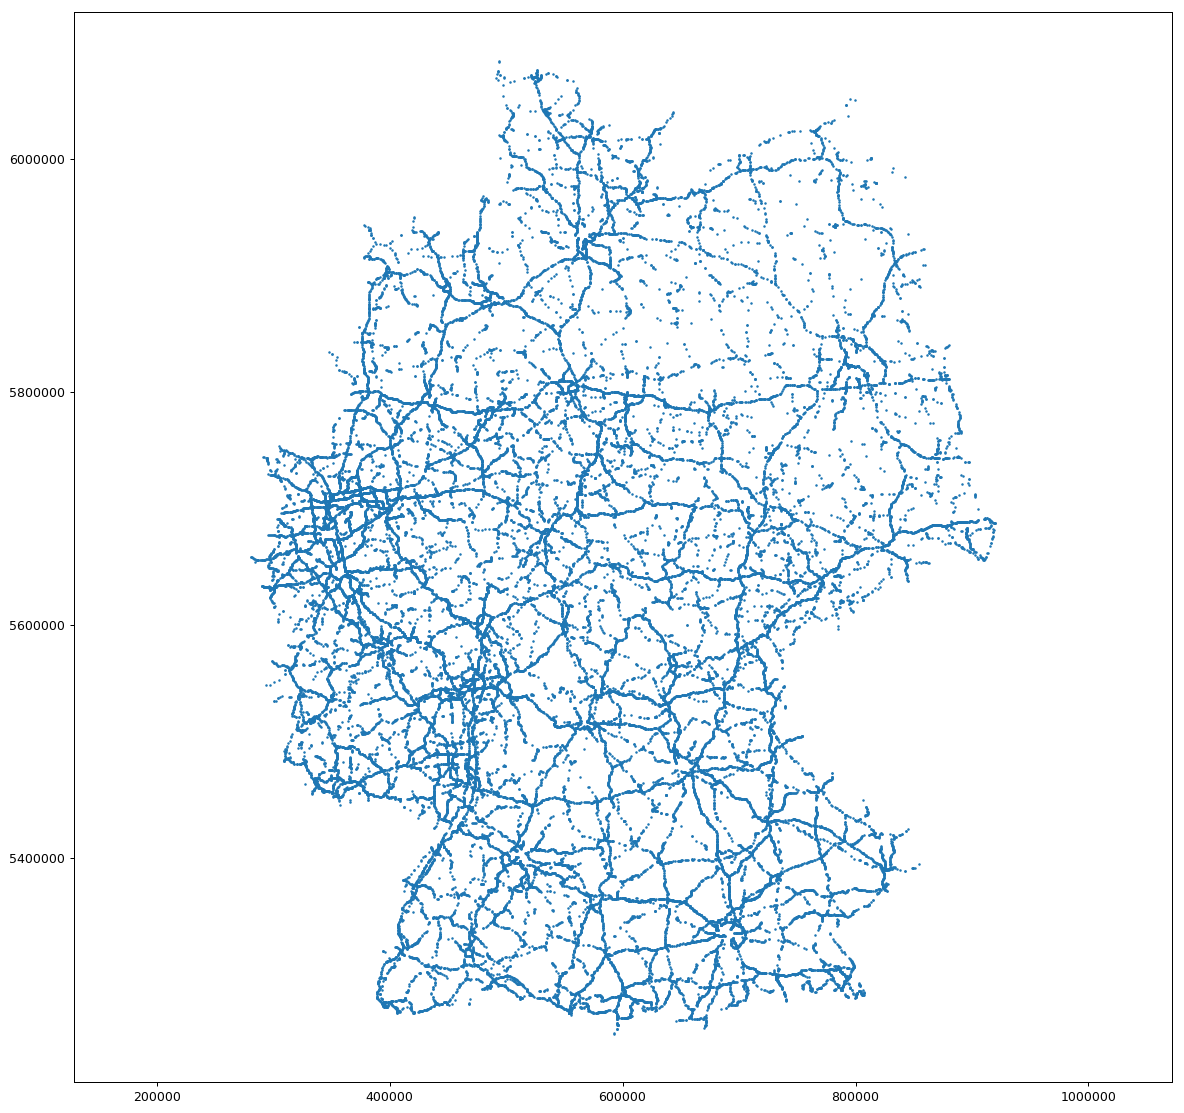

In [5]:
width=400;height=400
fig, ax = plt.subplots(1, 1, dpi=90, facecolor='w', edgecolor='k', figsize=(width / 25.4, height / 25.4))
ax.set_aspect("equal", "datalim")
ax.scatter(df[u'Geo UTM Ost'], df[u'Geo UTM Nord'], s=1)

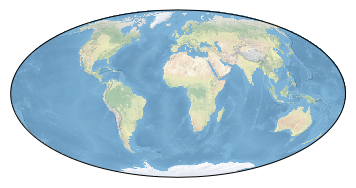

In [6]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.Mollweide())
ax.stock_img()
plt.show()

In [7]:
from mpl_toolkits.basemap import Basemap, addcyclic

In [8]:
from mpl_toolkits.basemap import pyproj 
p = pyproj.Proj(proj='utm',zone=32,ellps='WGS84')
df_ = df[~pd.isna(df[u'Geo UTM Ost'])].copy()
lons, lats = p(df_[u'Geo UTM Ost'].values, df_[u'Geo UTM Nord'].values,inverse=True) 

In [9]:
df_["lon"] = lons
df_["lat"] = lats
df_.head()
df["lon"] = np.nan
df["lat"] = np.nan
df.update(df_)
df.head()

,Bauwerksnr.,Name,Bundesland,Fläche (qm),Baujahr,Zustandsnote 09/2014,Zustandsnote 09/2015,Zustandsnote 03/2016,Zustandsnote 09/2016,Zustandsnote 03/2017,Zustandsnote 09/2017,Zustandsnote 03/2018,Geo UTM Ost,Geo UTM Nord,uuid,lon,lat
0,1019500-0,B 5 / Süderau,Schleswig-Holstein,63.0,1973.0,1.6,1.6,1.6,1.6,1.7,1.7,1.7,494241.4,6084088.0,646ac846dbaa5713a7591600589f8ee8,8.910192,54.903781
1,1119503-0,B 5 / Bosbüller Sielzug,Schleswig-Holstein,49.0,1961.0,2.3,2.3,2.3,2.3,2.2,2.2,2.2,492728.0,6074870.0,b71567c08e1f51639753a1b862a1f655,8.886823,54.820922
2,1119504-0,B 5 / Dreiharder Gotteskoog Strom,Schleswig-Holstein,62.0,1905.0,2.5,2.5,2.5,2.5,2.7,2.7,2.7,492821.2,6075575.0,cb79a5eacbef57f3ba0225d8c28ac7b7,8.888256,54.827259
3,1119505-0,B 5 / Kleiner Strom,Schleswig-Holstein,63.0,1962.0,2.8,2.8,2.8,2.8,2.8,2.8,2.2,494364.0,6083232.0,0f7cbd3a4e11559f96c62eb1a2486790,8.912121,54.896090
4,1119512-0,B 5 / Geh- und Radweg Klixbüll,Schleswig-Holstein,82.0,1981.0,1.8,1.8,1.8,1.8,2.0,2.0,2.0,492424.0,6073095.0,da9ab83ca7dc576ea7b4ea4e2b859bb7,8.882138,54.804966


In [10]:
df[["lon", "lat"]].describe()

,lon,lat
count,52673.000000,52673.000000
mean,9.702789,50.578745
std,2.053519,1.688532
min,5.876950,47.387135
25%,8.044965,49.277766
50%,9.525166,50.639553
75%,11.316074,51.727664
max,15.006942,54.903781


/home/lep/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/lep/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


Text(0.5,1,'bridges')

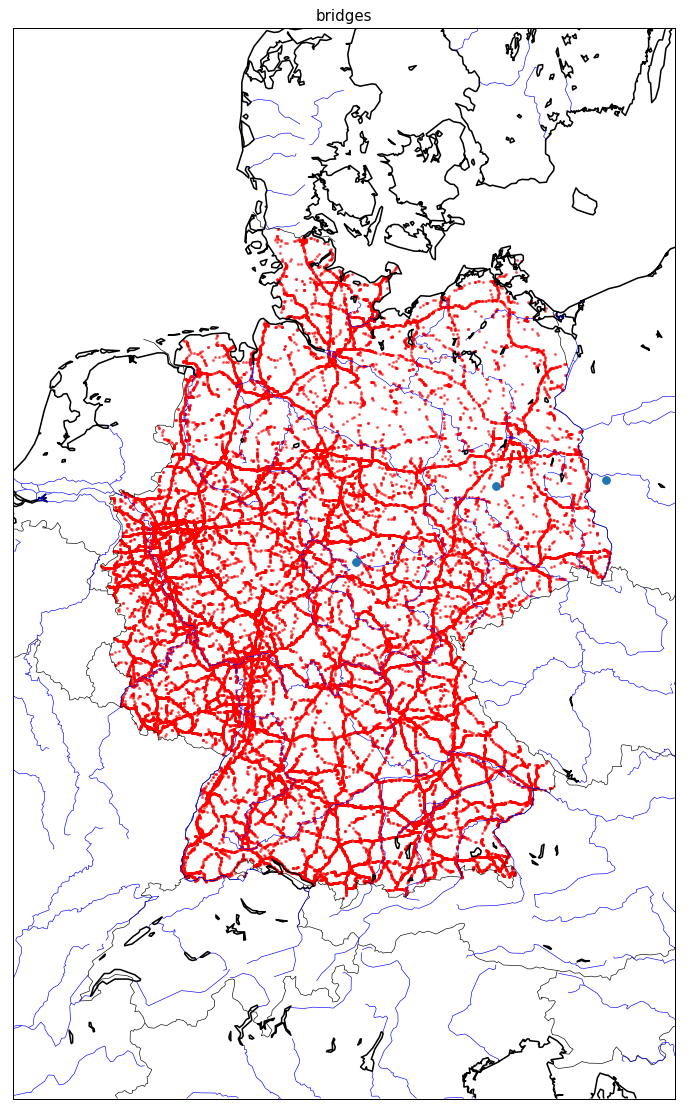

In [11]:
width=400;height=400
fig, ax = plt.subplots(1, 1, dpi=90, facecolor='w', edgecolor='k', figsize=(width / 25.4, height / 25.4))
m = Basemap(llcrnrlon=5.,llcrnrlat=45.,urcrnrlon=17.,urcrnrlat=57.,
            projection='lcc',lon_0=10.455,lat_0=51.165,
            resolution ='i',area_thresh=10., ax=ax)
m.drawcoastlines(linewidth=1.25)
x, y = m(df[u'lon'].values, df[u'lat'].values)
m.scatter(x,y, color="r", s=2, alpha=.5)

m.drawcountries()
m.drawrivers(color="b")
x, y = m([10.445, 13, 15], [51.165, 52, 52])
m.scatter(x,y)
ax.set_title("bridges")